In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing files
train_data = pd.read_excel(r"E:\DS\mini project 2\Data_Train.xlsx")

**Apending "r" or "R" befoe the file path id used to convert normal string to raw string .**  


In [4]:
train_data.info()
# it gives the information about non null-values and data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Here we can see that we have only have 1 missing value in "Route" and 1 missing value in "Total_stops" column.  
So its no problem and we can just delete it 

In [6]:
train_data.dropna(inplace=True)

## Data Preprocessing 

In [7]:
# make a copy of data file 
data = train_data.copy()

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# defining a function to change datatypes   
def change_into_datetime(col,data):
    data[col] = pd.to_datetime(data[col])

In [12]:
# now calling the defined functon
for features in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(features,data)
    

In [13]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] =  data['Date_of_Journey'].dt.month
data["Journey_year"] =  data['Date_of_Journey'].dt.year


In [14]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-03 05:50:00,2024-01-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-03 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [15]:
# now extract Hour and minutes of journey
#define a function to make it easy and less lengthy code 
def extract_hour_min(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute

In [16]:
# now call the function for diffretnt features
extract_hour_min(data,'Dep_Time')

In [17]:
extract_hour_min(data,'Arrival_Time')

In [18]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-03 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-03 05:50:00,2024-01-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


Now we have already extracted features from 'Arrival_Time' and 'Dep_Time' columns so we can delete them 

In [19]:
cols_to_drop =['Dep_Time','Arrival_Time']

data.drop(cols_to_drop,axis=1,inplace=True)

In [20]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


In [21]:
# Now we deal with "Duration" feature 
def duration_preprocess(x):
    if 'h' not in x:
        x = '0h'+' '+x
    elif 'm' not in x:
        x = x+' '+'0m'
    return x 

In [22]:
data['Duration'] = data['Duration'].apply(duration_preprocess)

In [23]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [24]:
# now extract Duration by hours and mins 
data['Duration_hours'] = data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [25]:
data['Duration_mins'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


## Let's Perform Data Analysis

**Lets analyse when will most of the flights take-off** 

In [27]:
# defining a function for this 
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [33]:
# Now apply the function in data
flight_time = data['Dep_Time_hour'].apply(flight_dep_time)

In [31]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50


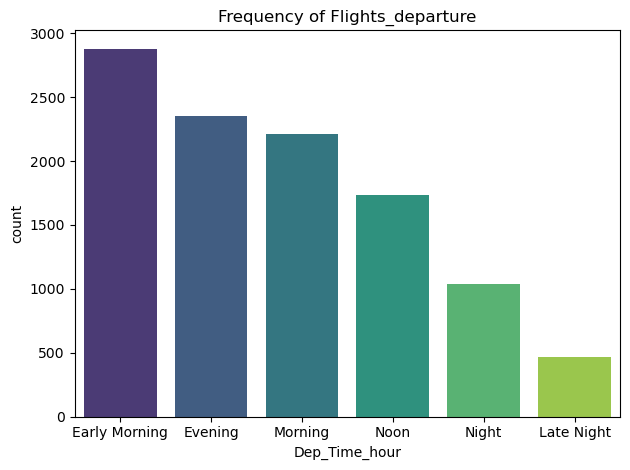

In [38]:
sns.countplot(data=data,x=flight_time,palette='viridis',order=flight_time.value_counts().index)
plt.title('Frequency of Flights_departure')
plt.tight_layout()
plt.show()

We clearly see that most of the flights take off at  Early Morning and Morning and the at evening 

**Now analyse about whether duration impacts on price or not**

In [33]:
data['duration_total_min'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

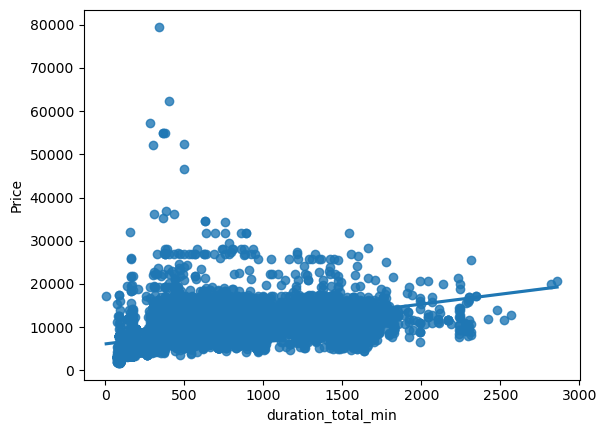

In [34]:
sns.regplot(x='duration_total_min', y='Price', data=data)
plt.show()

We clearly see with the increase in the flight duration the price is also increasing 

**Bi-Variate Analysis**

Let's see on which Route Jetairways ia extremely used

In [35]:
data[data['Airline']=="Jet Airways"].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Now let's analyse Airlines vs price 

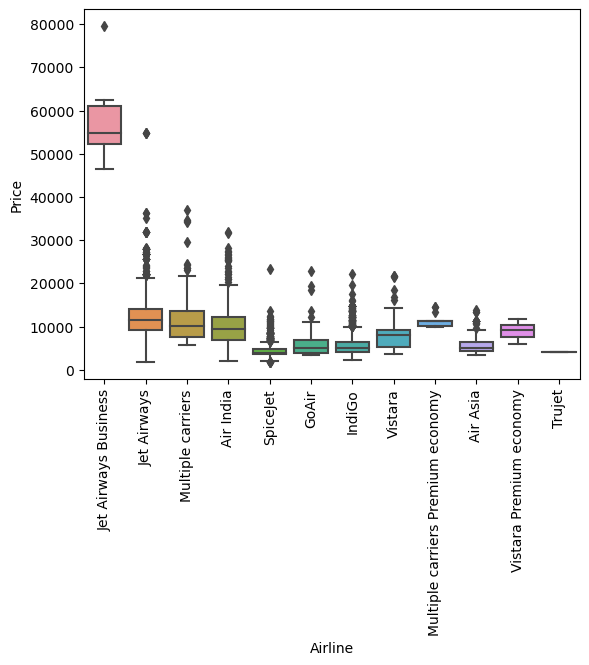

In [36]:
sns.boxplot(x = "Airline", y = "Price",data=data.sort_values("Price",ascending=False))
plt.xticks(rotation="vertical")
plt.show()

## Let's perform some Feature Engineering

In [37]:
cat_col = [col for col in data.columns if data[col].dtypes == "object"]

In [38]:
num_col = [col for col in data.columns if data[col].dtypes != "object"]

In [39]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

We can genrally follow the thumb rule in feature genration is that :    
1. if the data is Nominal data then we go for **OneHot-Encoding**.  
2. if the data is ordinal data then we go for **Label Encoding**

In [40]:
for sub_category in data['Source'].unique():
    data['Source'+sub_category] = data['Source'].apply(lambda x:1 if x==sub_category else 0)

In [41]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,duration_total_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


Target guided encoding on data means creating dictionary to tell the importance of features while model building.  

In [42]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [43]:
# implementing the index 
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [44]:
# now creating a dictionary
dict_airlines = {key:index for index,key in enumerate (airlines,0)}
print(dict_airlines)

{'Trujet': 0, 'SpiceJet': 1, 'Air Asia': 2, 'IndiGo': 3, 'GoAir': 4, 'Vistara': 5, 'Vistara Premium economy': 6, 'Air India': 7, 'Multiple carriers': 8, 'Multiple carriers Premium economy': 9, 'Jet Airways': 10, 'Jet Airways Business': 11}


In [45]:
# now use map function of pandas to change in dataframe 
data['Airline'] = data['Airline'].map(dict_airlines)
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [46]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [47]:
# as we now delhi and new delhi is same city so we can change it accordingly 
data['Destination'].replace('New Delhi','Delhi',inplace = True)

In [48]:
# similarly again we do target guided encoding
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
print(dest)

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')


In [49]:
dict_dest = {key:index for index , key in enumerate(dest,0)}
print(dict_dest)

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}


In [50]:
# now apply mapping
data['Destination'] = data['Destination'].map(dict_dest)
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [51]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,duration_total_min,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0


In [52]:
data['Total_Stops'].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
# now let's perform Label encoding on column "Total_Stops" as it is a ordinal data
stops = {'non-stop':0,
        '1 stop':1,
        '2 stops':2,
        '3 stops':3,
        '4 stops':4
    }

In [54]:
data['Total_Stops'] = data['Total_Stops'].map(stops)
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

As we have preprocessed our data quite well and it's okey to delete some unecessary data 

In [55]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'duration_total_min', 'SourceBanglore',
       'SourceKolkata', 'SourceDelhi', 'SourceChennai', 'SourceMumbai'],
      dtype='object')

In [56]:
data.drop(columns=['Date_of_Journey', 'Additional_Info','Source','duration_total_min','Journey_year','Route','Duration'],axis = 1 , inplace =True)

In [57]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


## Handling Outliers

In [58]:
def plot (df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax = ax1 )
    sns.boxplot(df[col], ax = ax2 )

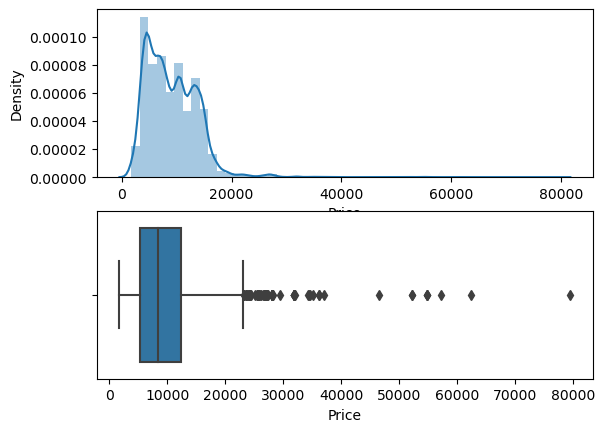

In [59]:
plot(data,'Price')

We clearly see that the plot is right-skewed and there are the outliers.
There are many ways to deal with outliers but one of them is to replace the outliers with the median value of data.  
**Q. Why to replace outliers with median not with he mean ?**  
This is simply explained as the mean is badly affected from the outliers whereas median is not affected as it is the middle value .

In [60]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

#define IQR 
IQR = q3 - q1

# now define the fencing of whisker plot
minimum = q1 - 1.5 * IQR
maximum = q3 + 1.5 * IQR

In [61]:
print(maximum)

23017.0


In [62]:
print(minimum)

-5367.0


In [63]:
len([price for price in data['Price'] if price > maximum or  price < minimum])

94

we see we have 94 outiers 

In [64]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

In [65]:
data['Price'] = np.where(data['Price']<=-6000,data['Price'].median(),data['Price'])

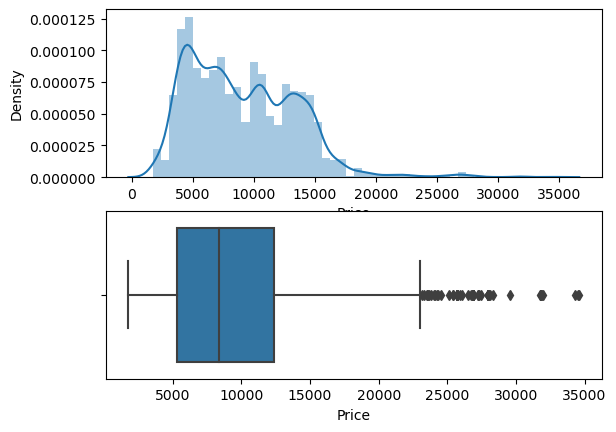

In [66]:
plot(data,'Price')

**Let's perform feature selection**

Amoung diffrent approaches we use Mutual_information approach for this 

In [67]:
#let's saperate target and independent variable 
x = data.drop(['Price'],axis = 1)
y = data['Price']

In [68]:
from sklearn.feature_selection import mutual_info_regression

In [69]:
imp = mutual_info_regression(x,y)

In [70]:
imp_df = pd.DataFrame(imp,index=x.columns)
imp_df.columns = ['Importance']
imp_df

,Importance
Airline,0.976147
Destination,1.001131
Total_Stops,0.793768
Journey_day,0.196650
Journey_month,0.242755
Dep_Time_hour,0.337851
Dep_Time_minute,0.254843
Arrival_Time_hour,0.401988
Arrival_Time_minute,0.359574
Duration_hours,0.465548


we see that every column have some importance with the target variable so its good that we select all the feauters for model building 

## Model building and evalutaion of model

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [73]:
#applying RandonForest
from sklearn.ensemble import RandomForestRegressor

In [74]:
# initialize the model
ml_model = RandomForestRegressor()

In [75]:
# now fit the model
ml_model.fit(x_train,y_train)

RandomForestRegressor()

In [76]:
y_pred = ml_model.predict(x_test)
y_pred

array([16773.29,  6552.04,  8885.88, ...,  3544.94,  6261.51,  6961.97])

In [77]:
# Evaluating the model
from sklearn import metrics

In [78]:
metrics.r2_score(y_test,y_pred)

0.8071847361701203

we get the r2 score about 0.80 which is considerd as a good performance of the model

In [79]:
# now we save or dump the model
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [80]:
import pickle

In [81]:
file = open('rf_random.pkl','wb')

In [82]:
pickle.dump(ml_model,file)

In [83]:
model = open('rf_random.pkl','rb')

In [84]:
# now load the model
forest = pickle.load(model)

In [85]:
# Example
forest.predict(x_test)

array([16773.29,  6552.04,  8885.88, ...,  3544.94,  6261.51,  6961.97])